In [3]:
import numpy as np
import sep
import astropy
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

The cell above imports the numpy, sep, astropy, and matplotlib.pyplot libraries. It also imports fits and rcParams.

In [4]:
data = astropy.io.fits.getdata("image.fits")
print(data)
#print(HDUList)

[[7010.5156 6878.9927 6963.752  ... 6905.297  6782.542  6876.07  ]
 [6990.0566 6759.16   6855.6104 ... 6770.8516 6840.997  6744.547 ]
 [6919.911  6855.6104 6864.379  ... 6800.0786 6881.915  6677.3237]
 ...
 [6773.774  6770.8516 6791.3105 ... 6849.765  6911.1426 6817.615 ]
 [6776.697  6899.4517 6776.697  ... 6855.6104 6864.379  6823.4604]
 [6846.843  6928.679  6873.1475 ... 6767.9287 6849.765  6767.9287]]


ESO-LOG 00:00:00> DATE         = '1992-10-26'  / Mon Oct 26, 1992                [astropy.io.fits.card]
ESO-LOG 03:04:08>-START EXPO EMMI RED          / Start exp. on EMMI Red CC       [astropy.io.fits.card]
ESO-LOG 03:04:09> EXPO EMMI RED NO = 24887     / Exp. num. on EMMI Red CCD       [astropy.io.fits.card]
ESO-LOG 03:10:52>-STOP EXPO EMMI RED           / Stop exp. on EMMI Red CCD       [astropy.io.fits.card]


The cell above reads the data into a variable called 'data.'

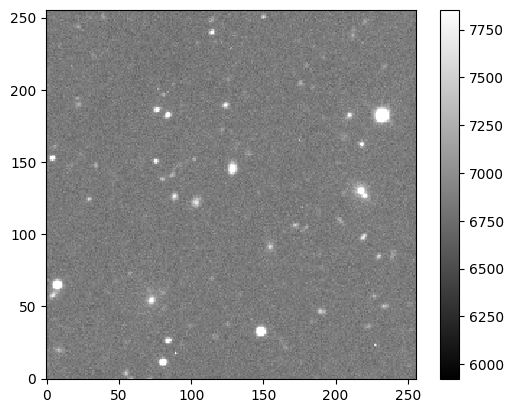

In [22]:
m, s = np.mean(data), np.std(data)

plt.imshow(data, interpolation='nearest' , cmap='gray' , vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

plt.savefig("Figure-1.png" ,bbox_inches="tight" ,dpi= 600 ,facecolor="none")

The above cell takes the mean of the data and equates it to a variable 'm,' and takes the standarad deviation of the data and equates it to a variable 's.' The cell then prints the image and a colorbar with it. It also saves the figure as a PNG.

In [6]:
bkg = sep.Background(data)

The above cell makes a background object using the sep package.

In [7]:
print(bkg.globalback)
print(bkg.globalrms)

6852.04931640625
65.46174621582031


The above cell "gets a 'global' mean and noise of the image background."

In [8]:
bkg_image = bkg.back()

The above cell makes the background a 2-d array 

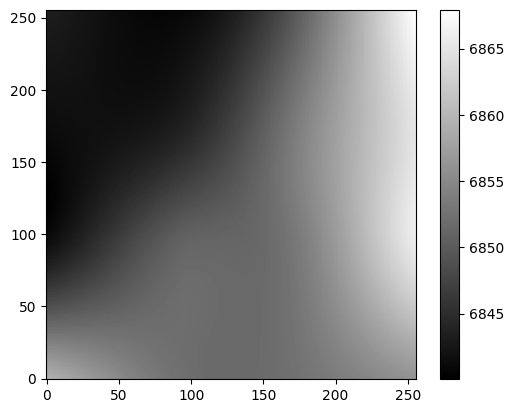

In [19]:
plt.imshow(bkg_image, interpolation='nearest' ,cmap='gray' ,origin='lower')
plt.colorbar();

plt.savefig("Figure-2.png" ,bbox_inches="tight" ,dpi= 600 ,facecolor="none")

The above cell shows the background object as an image and shows the colorbar assosciated with it. It also saves the figure as a PNG.

In [10]:
bkg_rms = bkg.rms()

the above cell makes the background noise into a 2-d array

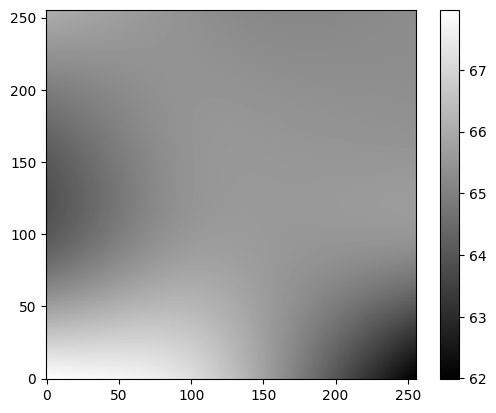

In [20]:
plt.imshow(bkg_rms, interpolation='nearest' ,cmap='gray' ,origin='lower')
plt.colorbar();

plt.savefig("Figure-3.png" ,bbox_inches="tight" ,dpi= 600 ,facecolor="none")

The above cell shows the background noise as an image with its colorbar. It also saves the figure as a PNG.

In [12]:
data_sub = data - bkg

This cell will subtract the background from the data.

In [13]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

len(objects)

68

This cell uses sep.extract to detect objects and then measures how many objects were detected.

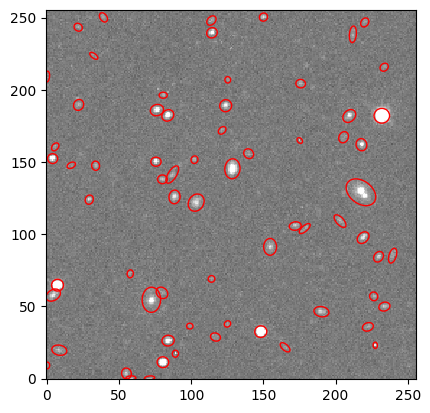

In [23]:
from matplotlib.patches import Ellipse
fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub , interpolation='nearest' , cmap='gray', vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects ['y'][i]), width=6*objects['a'][i], height=6*objects['b'][i], angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)

plt.savefig("Figure-4.png" ,bbox_inches="tight" ,dpi= 600 ,facecolor="none")

The cell above plots the background subtracted image and uses the ellipse matplotlib patch to highlight where the objects are. It also saves the figure as a PNG.

In [15]:
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

The above cell shows the other fields that 'objects' can be used for.

In [16]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'], 3.0, err=bkg.globalrms, gain=1.0)

this cell starts off the code for the aperture photometry by setting flux, fluxerr, and flag as 1-d arrays

In [17]:
for i in range (10):
    print('object {:d}: flux = {:f} +/- {:f}' .format(i, flux[i], fluxerr[i]))

object 0: flux = 2249.157852 +/- 291.027799
object 1: flux = 3092.217500 +/- 291.592199
object 2: flux = 5949.861113 +/- 356.561993
object 3: flux = 1851.419824 +/- 295.028805
object 4: flux = 72736.380312 +/- 440.172199
object 5: flux = 3860.756895 +/- 352.163163
object 6: flux = 6418.902715 +/- 357.458957
object 7: flux = 2210.714238 +/- 350.791233
object 8: flux = 2741.609297 +/- 352.277749
object 9: flux = 20916.877363 +/- 376.966141


This cell prints the first ten objects.